# Eccentric Comets (HERMES tutorial)
In this example, we study highly eccentric comets which interact with a Neptune mass planet.

HERMES, a hybrid integration scheme which combines the WHFAST and IAS15 algorithms, is well suited to study this problem, since the algorithm will automatically switch to IAS15 during the perihelion passage of a comet or a close encounter with the planet but otherwise will use a large timestep with the symplectic WHFast integrator.

In [55]:
import rebound
import numpy as np

First let's choose the basic properties required for the HERMES integrator to run correctly. In particular, we are:  
* Adding comets as *semi-active* bodies, which means they can influence/be influenced by other active bodies, but are invisible to each other. This is done by setting `testparticle_type` to 1. Setting `testparticle_type` to 0 would indicate that we are adding comets as *test* bodies.
* Colliding bodies merge perfectly conserving momentum and mass.
* Particles that leave our pre-defined box get removed from the simulation.
* We track the energy lost due to ejections or collisions.  

In [56]:
sim = rebound.Simulation()

#integrator options
sim.integrator = "hermes"
sim.ri_hermes.radius_switch_factor = 30.    #boundary for close encounters with Sun. Units of physical radius.
sim.ri_hermes.hill_switch_factor = 4.       #Setting HSF "floor", adaptive HSF routine is active by default.
sim.dt = 4.
sim.testparticle_type = 1

#collision and boundary options
sim.collision = "direct"
sim.collision_resolve = "merge"
sim.collision_resolve_keep_sorted = 1
sim.boundary = "open"
boxsize = 200.
sim.configure_box(boxsize)
sim.track_energy_offset = 1

Now that the preliminary setup is complete, it's time to add some particles to the system! When using the HERMES integrator it's always important to add active bodies first and semi-active bodies later. The "sim.N_active" variable distinguishes massive bodies from semi-active/test bodies.

In [57]:
#massive bodies
sim.add(m=1., r=0.005)                        # Sun
a_neptune = 30.05
sim.add(m=5e-5, r=2e-4, a=a_neptune, e=0.01)  # Neptune

sim.N_active = sim.N

Now, let's create some comets! For this simple example we are assuming that all comets have the same mass and radius. Other, more complicated choices are certainly possible. 

In [58]:
#semi-active bodies
n_comets = 100
a = np.random.random(n_comets)*10. + a_neptune
e = np.random.random(n_comets)*0.1 + 0.8
inc = np.random.random(n_comets)*np.pi/2.
m=1e-14
r=1e-7

for i in xrange(0,n_comets):
    sim.add(m=m, r=r, a=a[i], e=e[i], inc=inc[i], Omega=0, omega=np.random.random()*2.*np.pi, f=np.random.random()*2.*np.pi)

We need to move to the COM frame to avoid drifting out of our simulation box. Also it is always good practice to monitor the change in energy over the course of a simulation, which requires us to calculate it before and after the simulation.

In [59]:
sim.move_to_com()
E0 = sim.calculate_energy()

We can visualize our setup using rebound.OrbitPlot

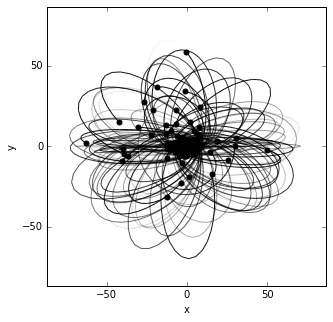

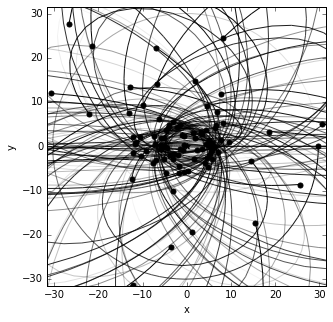

In [60]:
%matplotlib inline
rebound.OrbitPlot(sim, trails=True);
rebound.OrbitPlot(sim, trails=True, lim=1.05*a_neptune);

Finally, let's simulate our system for and check that our final relative energy error is small. The energy error is a key measure of whether the integration was performed accurately or not. 

In [64]:
sim.integrate(5e4)
dE = abs((sim.calculate_energy() - E0)/E0)
print("Relative energy error: %e"% dE)

Relative energy error: 2.576005e-12
